[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-04.ipynb)


* 강좌 보기 : https://www.boostcourse.org/ds214/


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [2]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [5]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [6]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [8]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [9]:
y = df['Outcome']
y.shape

(768,)

In [10]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [12]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

In [15]:
# 사이킷런 모델 사용 시 옵션 모두 출력
from sklearn._config import get_config, set_config

set_config(print_changed_only=False) #기본 설정: True

In [16]:
# DecisionTree를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

- DecisionTreeClassifier 장점 : 시각화가 용이

- max_depth : 트리 깊이
- gini : 트리 그리기를 멈추는 지니 계수. 0으로 지정 시 지니 계수가 0일 때 분기 멈춘다는 뜻
- min_samples_leaf, min_samples_split 등을 조정해 오버피팅 방지할 수 있음

### 최적의 max_depth 값 찾기

In [26]:
# for문 사용해 최적의 값 찾기
for max_depth in range(3,12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [56]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

param_grid = {"max_depth": range(3,12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=42,
                                              splitter='best'),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             pre_dispatch='2*n_jobs', refit=True,

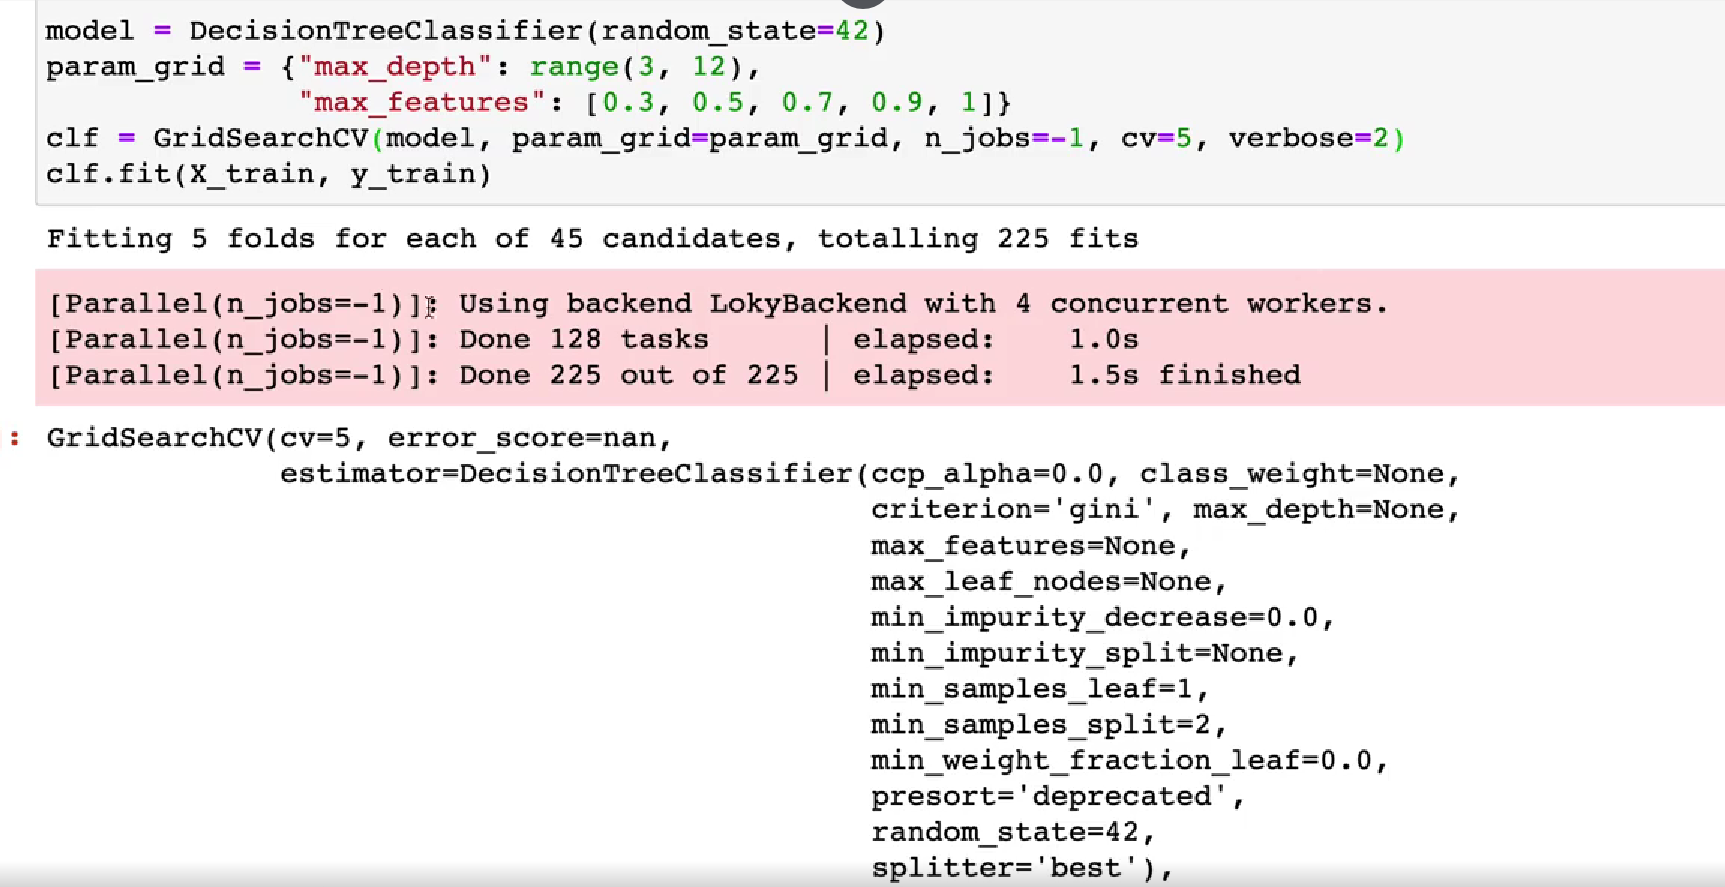
- verbose=1 또는 verbose=2 설정하면 로그가 나온다는데 왜 나는 안나올까?
- verbose
    - 함수 수행시 발생하는 상세한 정보를 표준 출력으로 자세히 내보낼 것인지 선택
    - 보통 0 은 출력하지 않고, 1은 자세히, 2는 함축적인 정보만 출력하는 형태

In [31]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [33]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

In [34]:
clf.best_score_

0.8664934026389444

In [36]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.005270,0.000376,0.002164,0.000403,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.005222,0.000392,0.002219,0.000439,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.005659,0.000460,0.002201,0.000400,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.005085,0.000611,0.002413,0.000355,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.005492,0.000425,0.002800,0.000748,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [37]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [38]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [39]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

In [40]:
# 1. 지정
param_distributions = {"max_depth": range(2,20),
                      "max_features": [0.1, 0.3, 0.5, 0.7, 0.9, 1]}
param_distributions

{'max_depth': range(2, 20), 'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

In [43]:
# 2. ramdom하게
max_depth = np.random.randint(3,20,10)
max_depth

array([ 4,  9,  6,  3, 17, 19,  6,  6, 15, 16])

In [45]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [46]:
param_distributions = {"max_depth": max_depth,
                      "max_features": max_features,
                      "min_samples_split": list(range(2,7))}
param_distributions

{'max_depth': array([ 4,  9,  6,  3, 17, 19,  6,  6, 15, 16]),
 'max_features': array([0.88757986, 0.97389959, 0.95030803, 0.96737351, 0.92545007,
        0.74821061, 0.99921325, 0.90787899, 0.85104658, 0.94400338,
        0.82397312, 0.82123195, 0.95388412, 0.91403674, 0.78200035,
        0.70132984, 0.87414019, 0.70045473, 0.96312585, 0.96016776,
        0.87026885, 0.93855445, 0.96958967, 0.88409757, 0.74948503,
        0.75367951, 0.85962763, 0.95181256, 0.77486871, 0.7215377 ,
        0.87546914, 0.81272428, 0.94859924, 0.75128618, 0.70334942,
        0.86219527, 0.94572817, 0.80470417, 0.76130099, 0.71510576,
        0.77679027, 0.74408421, 0.9571736 , 0.86718522, 0.88553257,
        0.72032239, 0.74346902, 0.72790324, 0.99670382, 0.71002621,
        0.88083899, 0.89372981, 0.8292279 , 0.85342638, 0.74082416,
        0.78641486, 0.70104061, 0.82758507, 0.76945534, 0.76847222,
        0.73357173, 0.71975996, 0.99769487, 0.85283367, 0.80399918,
        0.7734919 , 0.73974815, 0.783

In [48]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                  param_distributions,
                  n_iter=100,
                  scoring="accuracy",
                  n_jobs=-1,
                  cv=5,
                  random_state=42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=42,
                                                    splitter='best'),
                

In [49]:
clf.best_params_

{'min_samples_split': 5, 'max_features': 0.884020640514581, 'max_depth': 4}

In [52]:
clf.best_score_

0.8681060908969747

In [54]:
clf.score(X_test, y_test)

0.8766233766233766

- clf.best_score_ : random sample CV 수행했을 때의 가장 좋은 점수
- clf.score(X_test, y_test) : X_test, y_test 데이터로 수행했을 때의 점수

In [53]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
94,0.004841,9.861526e-04,0.002203,3.986067e-04,4,0.785196,4,"{'min_samples_split': 4, 'max_features': 0.785...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
71,0.005001,6.217196e-07,0.002001,2.336015e-07,6,0.87414,4,"{'min_samples_split': 6, 'max_features': 0.874...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
31,0.004640,8.682390e-04,0.002200,7.488380e-04,5,0.884021,4,"{'min_samples_split': 5, 'max_features': 0.884...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
92,0.004310,5.713128e-04,0.002006,6.316690e-04,4,0.812724,4,"{'min_samples_split': 4, 'max_features': 0.812...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
32,0.005702,4.112527e-04,0.002200,3.995662e-04,4,0.881343,16,"{'min_samples_split': 4, 'max_features': 0.881...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,5


- result 값을 확인하고 max값을 조정, iter 늘려서 수행하는 과정을 반복

## 학습과 예측하기

In [17]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [24]:
feature_names = X_train.columns.tolist()

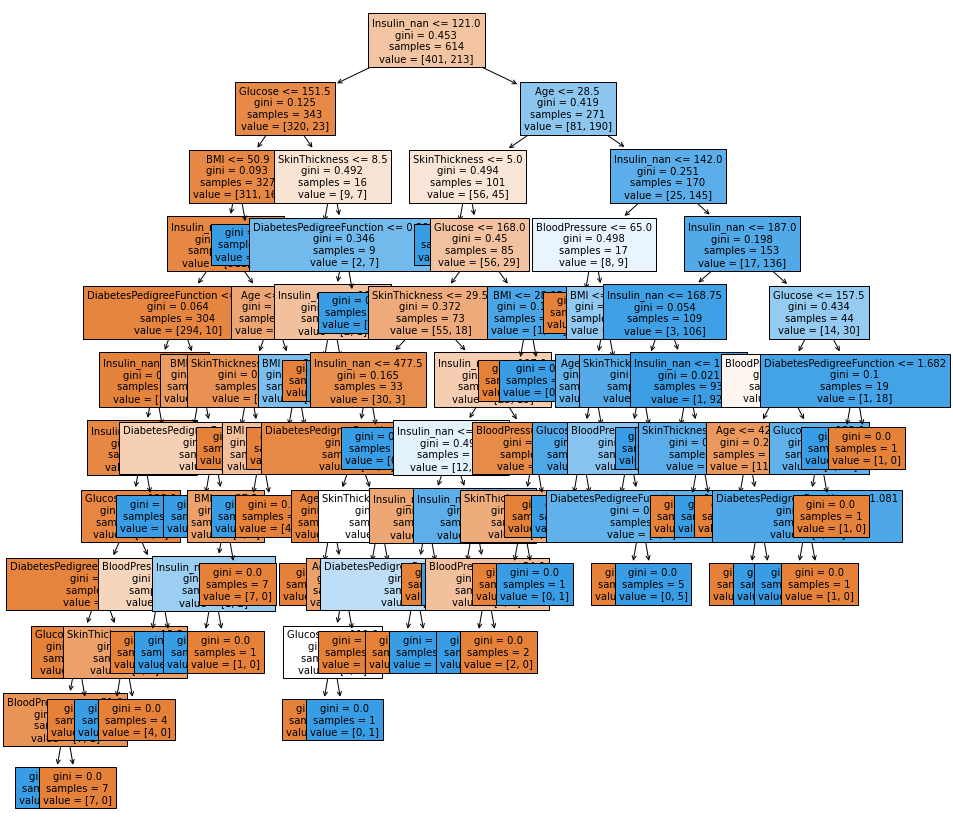

In [25]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [ ]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict[:5]

## 정확도(Accuracy) 측정하기

In [21]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()
# 두 값이 다르면 1 또는 -1 나올 것

# (y_predict != y_test).sum()

29

- 지난 번과 결과가 다른 이유 : 저번에는 순차적으로 데이터를 80프로 사용, 이번에는 train_test_split 사용했기 때문
- 동일한 조건으로 결과가 나오게 하고 싶다면 모델에도 random_state 설정하기!
- 성능을 올리는 방법
    1. Feature engineering
    2. Parameters 조정

In [22]:
# accuracy score를 구합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

81.16883116883116